# Importacion de librerias

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

#Carga de datos

In [7]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Mounted at /content/drive
Datos cargados exitosamente!


# Distribucion de los datos

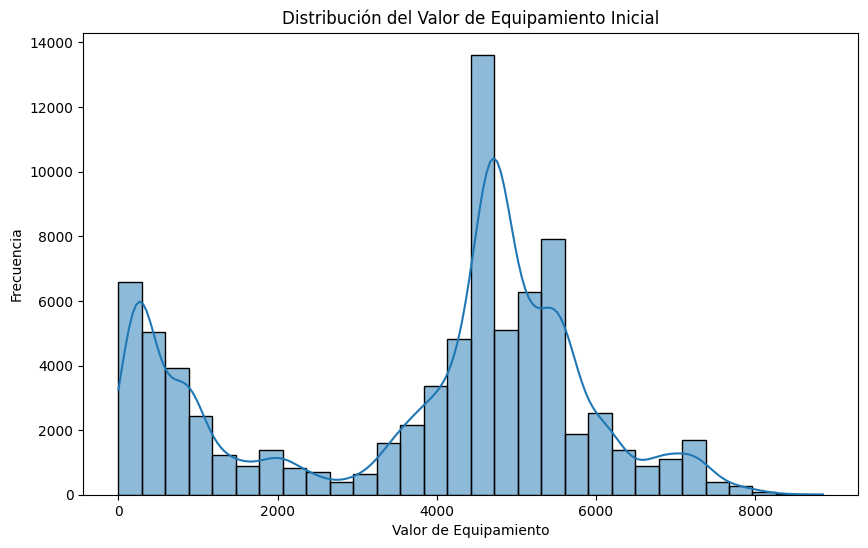

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RoundStartingEquipmentValue'], bins=30, kde=True)
plt.title('Distribución del Valor de Equipamiento Inicial')
plt.xlabel('Valor de Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

# Regresion en base a ROUNDID

In [9]:
# Variables
X1 = data[['RoundId']]
Y = data['RoundStartingEquipmentValue']

In [10]:
# Separar en entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.7, random_state=42)

In [11]:
# Crear y entrenar modelo
linreg1 = LinearRegression()
linreg1.fit(X1_train, y1_train)

LinearRegression()

In [12]:
# Predicciones
y1_pred = linreg1.predict(X1_test)

In [13]:
# Métricas
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, y1_pred)

print("Regresión usando RoundId:")
print(f'RMSE: {rmse1:.2f}')
print(f'R²: {r2_1:.2f}')


Regresión usando RoundId:
RMSE: 2102.37
R²: 0.02


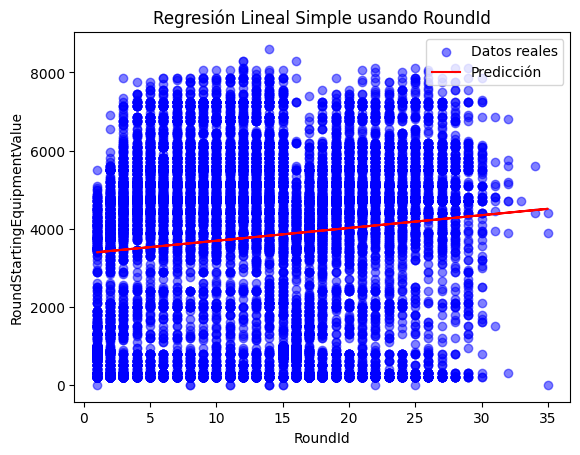

In [14]:

# Visualización
plt.scatter(X1_test, y1_test, color='blue', label='Datos reales', alpha=0.5)
plt.plot(X1_test, y1_pred, color='red', label='Predicción')
plt.xlabel('RoundId')
plt.ylabel('RoundStartingEquipmentValue')
plt.title('Regresión Lineal Simple usando RoundId')
plt.legend()
plt.show()


#Regresion en base a TeamStartingEquipmentValue

In [15]:
# Variable
X2 = data[['TeamStartingEquipmentValue']]

In [16]:
# Separar en entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, train_size=0.7, random_state=42)


In [17]:
# Crear y entrenar modelo
linreg2 = LinearRegression()
linreg2.fit(X2_train, y2_train)

LinearRegression()

In [18]:
# Predicciones
y2_pred = linreg2.predict(X2_test)

In [19]:

mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred) # Calculate MAE

print("Regresión usando TeamStartingEquipmentValue:")
print(f'MSE: {mse2:.2f}')  # Print MSE
print(f'MAE: {mae2:.2f}')  # Print MAE
print(f'RMSE: {rmse2:.2f}')
print(f'R²: {r2_2:.2f}')

Regresión usando TeamStartingEquipmentValue:
MSE: 668119.09
MAE: 517.88
RMSE: 817.39
R²: 0.85


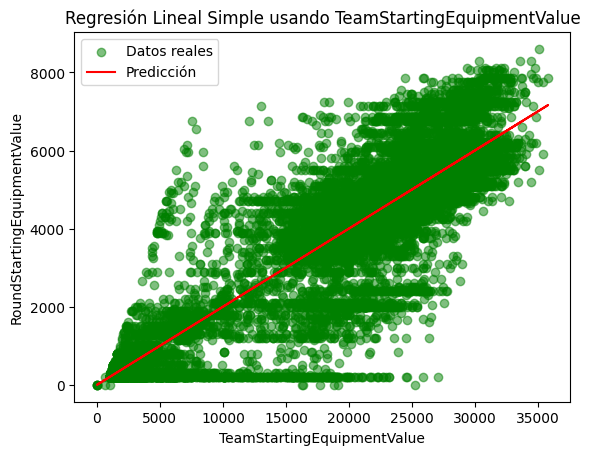

In [20]:

# Visualización
plt.scatter(X2_test, y2_test, color='green', label='Datos reales', alpha=0.5)
plt.plot(X2_test, y2_pred, color='red', label='Predicción')
plt.xlabel('TeamStartingEquipmentValue')
plt.ylabel('RoundStartingEquipmentValue')
plt.title('Regresión Lineal Simple usando TeamStartingEquipmentValue')
plt.legend()
plt.show()
